Import Necessary Packages

In [26]:
import pandas as pd
import seaborn as sns
import sqlite3

Parse DB and reconstruct look-up table

In [27]:
# Connect to DB
connection = sqlite3.connect("poker.db")
cursor = connection.cursor()

hand_keys = []
hand_counts = []

# Add Hand Names and counts to respective List
for row in cursor.execute("SELECT Hand FROM Poker"):
    hand_keys.append(row[0])

for row in cursor.execute("SELECT Count FROM Poker"):
    hand_counts.append(row[0])

connection.commit()
connection.close()

Unify the data lists to be visualized

In [28]:
df = pd.DataFrame({
    'Hands': hand_keys,
    'Hand Counts': hand_counts
})

# look at some rows in the data frame to make sure data was generated properly
df.head()

,Hands,Hand Counts
0,High Card,2682
1,One Pair,6486
2,Two Pairs,3592
3,Threes,775
4,Straight,726


Plot the chart using a color palette. Before plotting, set the chart size to width= 10 units and height= 12 units.

In [29]:
sns.set(rc={
    'figure.figsize': (5,5)
})

Plot the bar chart 'ax' and name its x&y axes. Use a color palette to represent the number with the intensity of the color.

Print the Hand Count as a label against each bar in the bar chart.

Et Voila 🪄✨

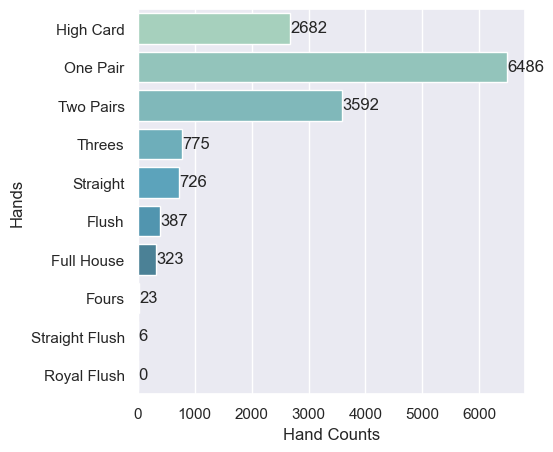

In [30]:
ax = sns.barplot(y="Hands",x='Hand Counts', data=df, palette="GnBu_d")

initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx + p.get_height()/8, "{:1.0f}".format(p.get_width()))
    initialx+=1